# Introduction to topological data analysis - Lecture 04
## 4.0 Complexes from data

Basic idea among all concepts: use a given metric to define a space/simplicial complex as a geometric model (not a statistical model yet!) for the data set

## Filtered spaces

**Definition:**

A *filtered space* is a sequence of spaces $\{X_t \}_{t \in \mathbb{R}}$ together with embeddings $X_s \hookrightarrow X_t$ for $s < t$.

In fancy language: a functor $X_* : \mathbb{R} \rightarrow (\operatorname{Top},emb)$.

A *filtered object* in a category $C$, where $C\in \{Top, \ regCW,\ Simp,\ Cub,\ Graph \}$ is a functor $X_* : \mathbb{R} \rightarrow (C,emb)$, where an embedding is understood to be a map that is an isomorphism onto its image.   

In [9]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
from gudhi import DelaunayCechComplex
from gudhi import RipsComplex
from scipy.spatial import Voronoi, voronoi_plot_2d

points = np.array([[0,0],[0,1],[1,2],[1,0],[0.5,-0.2],[0.5,1.6], [1.5,1]])
sizes = np.array([])
for a in points:
      sizes = np.concatenate((sizes,[20]))
bsizes = np.array([])
for a in points:
     bsizes = np.concatenate((bsizes,[1000]))
csizes = np.array([])
for a in points:
     csizes = np.concatenate((csizes,[2500]))
dsizes = np.array([])
for a in points:
     dsizes = np.concatenate((dsizes,[4000]))
esizes = np.array([])
for a in points:
     esizes = np.concatenate((esizes,[8000]))
fsizes = np.array([])
for a in points:
     fsizes = np.concatenate((fsizes,[16000]))
ebsizes = np.array([])
for a in points:
     ebsizes = np.concatenate((ebsizes,[10000]))

xpoints,ypoints  = points.T
#print(xpoints)
#Vor = Voronoi(points)
# plt.scatter(xpoints,ypoints)
#fig= voronoi_plot_2d(Vor)
#cpx = DelaunayCechComplex(points=points)
#print(cpx)
# plt.show
#VR = gd.RipsComplex(points=points, max_edge_length = 3, )
#stree = cpx.create_simplex_tree(output_squared_values=False)
#stree = VR.create_simplex_tree(max_dimension=7)
#print(f"Complex is of dimension {stree.dimension()} - {stree.num_simplices()} simplices - ",
#      f"{stree.num_vertices()} vertices.")
#for filtered_value in stree.get_filtration():
#    print("%s -> %.2f" % tuple(filtered_value))

## Proximity graphs

The idea is similar to single linkage clustering: inductively add edges of minimal distance. This time, add all such edges.

**Definition:** 

Let $X$ be a point cloud. Its proximity graph of radius $\epsilon$ is defined as
$$\operatorname{Pr}(X)_\epsilon := \{(p,q) \vert p,q \in X, d(p,q)\leq \epsilon \}$$

![title](04_01.png)

![title](04_02.png)

![title](04_03.png)

![title](04_04.png)

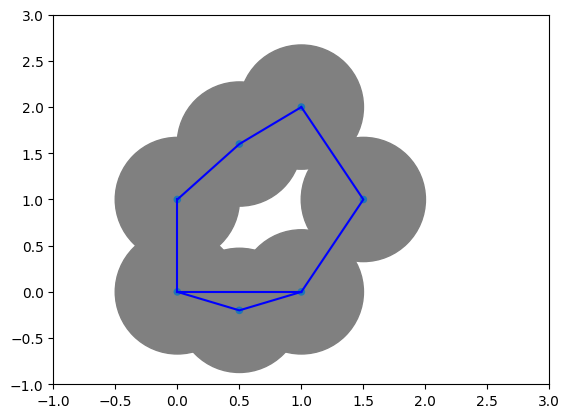

In [5]:
ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
plt.scatter(xpoints,ypoints,esizes,color='gray')
plt.scatter(xpoints,ypoints,sizes)
plt.plot([0,0.5,1],[0,-0.2,0],color='blue')
plt.plot([0,0.5,1],[1,1.6,2],color='blue')
plt.plot([0,0],[0,1],color='blue')
plt.plot([1,1.5,1],[0,1,2],color='blue')
plt.plot([0,1],[0,0],color='blue')
plt.savefig('04_05a')


![title](04_05a.png)

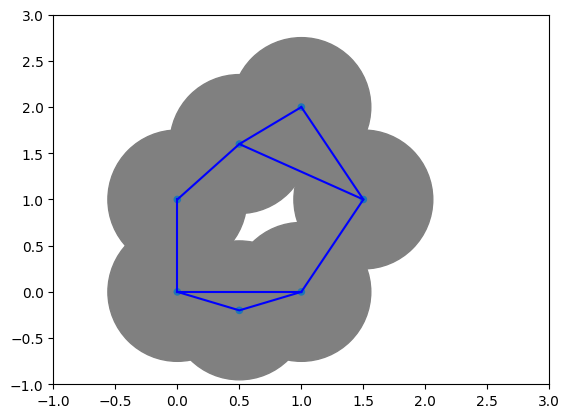

In [16]:
ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
plt.scatter(xpoints,ypoints,ebsizes,color='gray')
plt.scatter(xpoints,ypoints,sizes)
plt.plot([0,0.5,1],[0,-0.2,0],color='blue')
plt.plot([0,0.5,1],[1,1.6,2],color='blue')
plt.plot([0,0],[0,1],color='blue')
plt.plot([1,1.5,1],[0,1,2],color='blue')
plt.plot([0,1],[0,0],color='blue')
plt.plot([0.5,1.5],[1.6,1],color='blue')
plt.savefig('04_05b')


![title](04_05b.png)

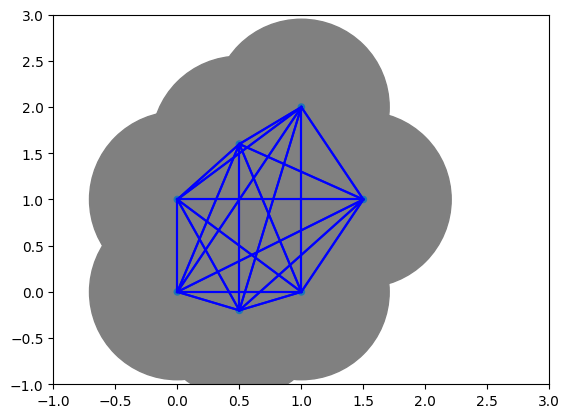

In [26]:
ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
plt.scatter(xpoints,ypoints,fsizes,color='gray')
plt.scatter(xpoints,ypoints,sizes)
for a in points:
   for b in points:
    plt.plot([a[0],b[0]],[a[1],b[1]],color='blue')


plt.savefig('04_06a')


![title](04_06a.png)

## The Vietoris--Rips complex


Named after Leopold Vietoris (introduced parameter dependend homology for metric spaces) and Eliyahu Rips (applied parameter dependend homology to hyperbolic geometry).


**Definition:** Let $X \subset \mathbb{R}^d$ be a point cloud. The *Vietoris--Rips complex* of $X$ is defined as
$$
\operatorname{VR}_\epsilon(X) := \{\sigma \subset X \vert d(p,q)\leq \epsilon \ \forall p,q \in \sigma \}.
$$

**Remark:** $\operatorname{VR}_\epsilon(X) \subset \Delta^{\lvert X\rvert -1}$.

$\Rightarrow$ Number of simplices increases exponentially: $2^{\lvert X \rvert}-1$.

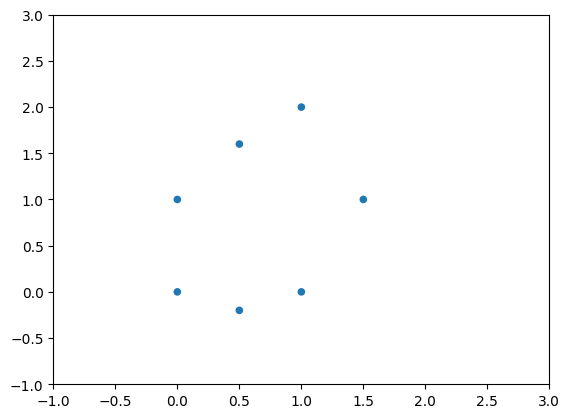

In [16]:
ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
plt.scatter(xpoints,ypoints,sizes)
plt.savefig('04_01')

![title](04_01.png)

In [23]:
print(points)

[[ 0.   0. ]
 [ 0.   1. ]
 [ 1.   2. ]
 [ 1.   0. ]
 [ 0.5 -0.2]
 [ 0.5  1.6]
 [ 1.5  1. ]]


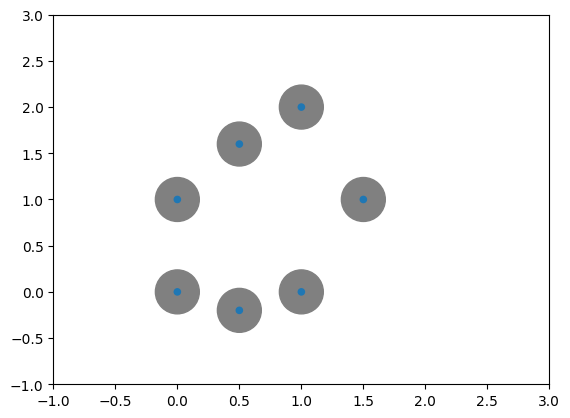

In [17]:
ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
plt.scatter(xpoints,ypoints,bsizes,color='gray')
plt.scatter(xpoints,ypoints,sizes)
plt.savefig('04_02')

![title](04_02.png)

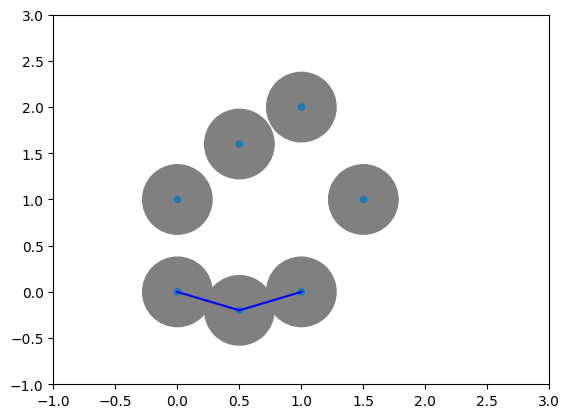

In [18]:
ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
plt.scatter(xpoints,ypoints,csizes,color='gray')
plt.scatter(xpoints,ypoints,sizes)
plt.plot([0,0.5,1],[0,-0.2,0],color='blue')
plt.savefig('04_03')

![title](04_03.png)

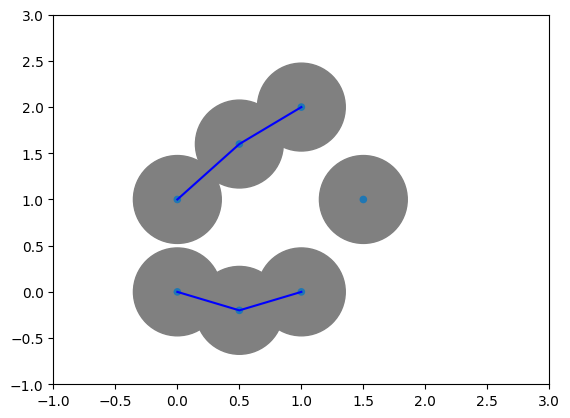

In [19]:
ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
plt.scatter(xpoints,ypoints,dsizes,color='gray')
plt.scatter(xpoints,ypoints,sizes)
plt.plot([0,0.5,1],[0,-0.2,0],color='blue')
plt.plot([0,0.5,1],[1,1.6,2],color='blue')
plt.savefig('04_04')

![title](04_04.png)

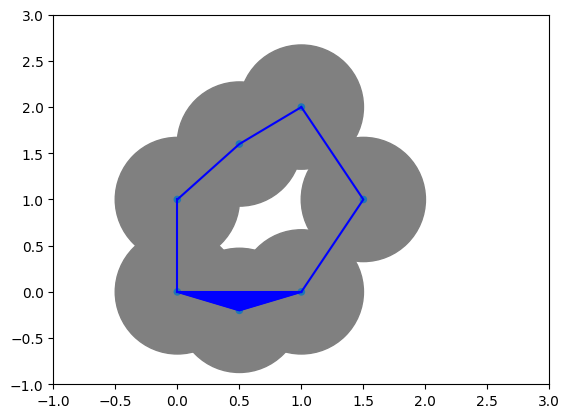

In [20]:
ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
plt.scatter(xpoints,ypoints,esizes,color='gray')
plt.scatter(xpoints,ypoints,sizes)
plt.plot([0,0.5,1],[0,-0.2,0],color='blue')
plt.plot([0,0.5,1],[1,1.6,2],color='blue')
plt.plot([0,0],[0,1],color='blue')
plt.plot([1,1.5,1],[0,1,2],color='blue')
plt.plot([0,1],[0,0],color='blue')
t1= plt.Polygon([[0,0],[0.5,-0.2],[1,0]],color='blue')
plt.gca().add_patch(t1)
plt.savefig('04_05')


![title](04_05.png)

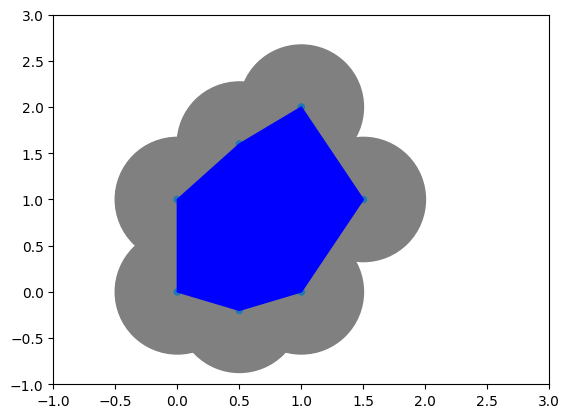

In [45]:
ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
plt.scatter(xpoints,ypoints,esizes,color='gray')
plt.scatter(xpoints,ypoints,sizes)
t2= plt.Polygon([[0,0],[0.5,-0.2],[1,0],[1.5,1],[1,2],[0.5,1.6],[0,1]],color='blue')
plt.gca().add_patch(t2)
plt.savefig('04_06')


![title](04_06.png)

In [105]:
VR = gd.RipsComplex(points=points, max_edge_length = 3, )
stree = VR.create_simplex_tree(max_dimension=7)


In [106]:
print(f"Complex is of dimension {stree.dimension()} - {stree.num_simplices()} simplices - ",
      f"{stree.num_vertices()} vertices.")
for filtered_value in stree.get_filtration():
    print("%s -> %.2f" % tuple(filtered_value))

Complex is of dimension 6 - 127 simplices -  7 vertices.
[0] -> 0.00
[1] -> 0.00
[2] -> 0.00
[3] -> 0.00
[4] -> 0.00
[5] -> 0.00
[6] -> 0.00
[0, 4] -> 0.54
[3, 4] -> 0.54
[2, 5] -> 0.64
[1, 5] -> 0.78
[0, 1] -> 1.00
[0, 3] -> 1.00
[0, 3, 4] -> 1.00
[2, 6] -> 1.12
[3, 6] -> 1.12
[5, 6] -> 1.17
[2, 5, 6] -> 1.17
[1, 4] -> 1.30
[0, 1, 4] -> 1.30
[1, 2] -> 1.41
[1, 3] -> 1.41
[0, 1, 3] -> 1.41
[1, 3, 4] -> 1.41
[0, 1, 3, 4] -> 1.41
[1, 2, 5] -> 1.41
[1, 6] -> 1.50
[1, 2, 6] -> 1.50
[1, 3, 6] -> 1.50
[1, 5, 6] -> 1.50
[1, 2, 5, 6] -> 1.50
[4, 6] -> 1.56
[1, 4, 6] -> 1.56
[3, 4, 6] -> 1.56
[1, 3, 4, 6] -> 1.56
[0, 5] -> 1.68
[0, 1, 5] -> 1.68
[3, 5] -> 1.68
[0, 3, 5] -> 1.68
[1, 3, 5] -> 1.68
[0, 1, 3, 5] -> 1.68
[3, 5, 6] -> 1.68
[1, 3, 5, 6] -> 1.68
[4, 5] -> 1.80
[0, 4, 5] -> 1.80
[1, 4, 5] -> 1.80
[0, 1, 4, 5] -> 1.80
[3, 4, 5] -> 1.80
[0, 3, 4, 5] -> 1.80
[1, 3, 4, 5] -> 1.80
[0, 1, 3, 4, 5] -> 1.80
[4, 5, 6] -> 1.80
[1, 4, 5, 6] -> 1.80
[3, 4, 5, 6] -> 1.80
[1, 3, 4, 5, 6] -> 1.80
[0, 

Complex is of dimension 6 - 127 simplices -  7 vertices.
[0] -> 0.00, 
[1] -> 0.00, 
[2] -> 0.00, 
[3] -> 0.00, 
[4] -> 0.00, 
[5] -> 0.00, 
[6] -> 0.00, 
[0, 4] -> 0.54, 
[3, 4] -> 0.54, 
[2, 5] -> 0.64, 
[1, 5] -> 0.78, 
[0, 1] -> 1.00, 
[0, 3] -> 1.00, 
[0, 3, 4] -> 1.00, 
[2, 6] -> 1.12, 
[3, 6] -> 1.12, 
[5, 6] -> 1.17, 
[2, 5, 6] -> 1.17, 
[1, 4] -> 1.30, 
[0, 1, 4] -> 1.30, 
[1, 2] -> 1.41, 
[1, 3] -> 1.41, 
[0, 1, 3] -> 1.41, 
[1, 3, 4] -> 1.41, 
[0, 1, 3, 4] -> 1.41, 
[1, 2, 5] -> 1.41, 
[1, 6] -> 1.50, 
[1, 2, 6] -> 1.50, 
[1, 3, 6] -> 1.50, 
[1, 5, 6] -> 1.50, 
[1, 2, 5, 6] -> 1.50, 
[4, 6] -> 1.56, 
[1, 4, 6] -> 1.56, 
[3, 4, 6] -> 1.56, 
[1, 3, 4, 6] -> 1.56, 
[0, 5] -> 1.68, 
[0, 1, 5] -> 1.68, 
[3, 5] -> 1.68, 
[0, 3, 5] -> 1.68, 
[1, 3, 5] -> 1.68, 
[0, 1, 3, 5] -> 1.68, 
[3, 5, 6] -> 1.68, 
[1, 3, 5, 6] -> 1.68, 
[4, 5] -> 1.80, 
[0, 4, 5] -> 1.80, 
[1, 4, 5] -> 1.80, 
[0, 1, 4, 5] -> 1.80, 
[3, 4, 5] -> 1.80, 
[0, 3, 4, 5] -> 1.80, 
[1, 3, 4, 5] -> 1.80, 
[0, 1, 3, 4, 5] -> 1.80, 
[4, 5, 6] -> 1.80, 
[1, 4, 5, 6] -> 1.80, 
[3, 4, 5, 6] -> 1.80, 
[1, 3, 4, 5, 6] -> 1.80, 
[0, 6] -> 1.80, 
[0, 1, 6] -> 1.80, 
[0, 3, 6] -> 1.80, 
[0, 1, 3, 6] -> 1.80, 
[0, 4, 6] -> 1.80, 
[0, 1, 4, 6] -> 1.80, 
[0, 3, 4, 6] -> 1.80, 
[0, 1, 3, 4, 6] -> 1.80, 
[0, 5, 6] -> 1.80, 
[0, 1, 5, 6] -> 1.80, 
[0, 3, 5, 6] -> 1.80, 
[0, 1, 3, 5, 6] -> 1.80, 
[0, 4, 5, 6] -> 1.80, 
[0, 1, 4, 5, 6] -> 1.80, 
[0, 3, 4, 5, 6] -> 1.80, 
[0, 1, 3, 4, 5, 6] -> 1.80, 
[2, 3] -> 2.00, 
[1, 2, 3] -> 2.00, 
[2, 3, 5] -> 2.00, 
[1, 2, 3, 5] -> 2.00, 
[2, 3, 6] -> 2.00, 
[1, 2, 3, 6] -> 2.00, 
[2, 3, 5, 6] -> 2.00, 
[1, 2, 3, 5, 6] -> 2.00, 
[0, 2] -> 2.24, 
[0, 1, 2] -> 2.24, 
[0, 2, 3] -> 2.24, 
[0, 1, 2, 3] -> 2.24, 
[0, 2, 5] -> 2.24, 
[0, 1, 2, 5] -> 2.24, 
[0, 2, 3, 5] -> 2.24, 
[0, 1, 2, 3, 5] -> 2.24, 
[0, 2, 6] -> 2.24, 
[0, 1, 2, 6] -> 2.24, 
[0, 2, 3, 6] -> 2.24, 
[0, 1, 2, 3, 6] -> 2.24, 
[0, 2, 5, 6] -> 2.24, 
[0, 1, 2, 5, 6] -> 2.24, 
[0, 2, 3, 5, 6] -> 2.24, 
[0, 1, 2, 3, 5, 6] -> 2.24, 
[2, 4] -> 2.26, 
[0, 2, 4] -> 2.26, 
[1, 2, 4] -> 2.26, 
[0, 1, 2, 4] -> 2.26, 
[2, 3, 4] -> 2.26, 
[0, 2, 3, 4] -> 2.26, 
[1, 2, 3, 4] -> 2.26, 
[0, 1, 2, 3, 4] -> 2.26, 
[2, 4, 5] -> 2.26, 
[0, 2, 4, 5] -> 2.26, 
[1, 2, 4, 5] -> 2.26, 
[0, 1, 2, 4, 5] -> 2.26, 
[2, 3, 4, 5] -> 2.26, 
[0, 2, 3, 4, 5] -> 2.26, 
[1, 2, 3, 4, 5] -> 2.26, 
[0, 1, 2, 3, 4, 5] -> 2.26, 
[2, 4, 6] -> 2.26, 
[0, 2, 4, 6] -> 2.26, 
[1, 2, 4, 6] -> 2.26, 
[0, 1, 2, 4, 6] -> 2.26, 
[2, 3, 4, 6] -> 2.26, 
[0, 2, 3, 4, 6] -> 2.26, 
[1, 2, 3, 4, 6] -> 2.26, 
[0, 1, 2, 3, 4, 6] -> 2.26, 
[2, 4, 5, 6] -> 2.26, 
[0, 2, 4, 5, 6] -> 2.26, 
[1, 2, 4, 5, 6] -> 2.26, 
[0, 1, 2, 4, 5, 6] -> 2.26, 
[2, 3, 4, 5, 6] -> 2.26, 
[0, 2, 3, 4, 5, 6] -> 2.26, 
[1, 2, 3, 4, 5, 6] -> 2.26, 
[0, 1, 2, 3, 4, 5, 6] -> 2.26


## The Vietoris--Rips complex

**Definition** Let $G$ be a graph. A *clique* in $G$ is a subgraph $G'\subset G$ that is isomorphic to a complete graph. The *flag complex/clique complex* of $G$ is defined as
$$
\operatorname{Cl}(X):= \{\sigma \subset X \vert \sigma \text{ is a clique} \}
$$

**Observation:** The Vietoris--Rips complex is the clique complex of the proximity graph. 

## The Čech complex

**Definition:** Let $X$ be a point cloud. The *Čech complex* of $X$ is defined as 

$$
Č_\epsilon(X):=\{\sigma \in X \vert \bigcap_{p\in \sigma} B_\epsilon(\sigma)\neq \emptyset \}
$$

**Definition:** Let $X$ be a space and let $\mathcal{U}:=\{U_i\}_{i \in I}$ be a cover of $X$. The nerve of $\mathcal{U}$ is the simplicial complex $\mathcal{N}(\mathcal{U})$ that has

-vertices: $U_i$

-n-simplices: $\{U_{i_0},U_{i_1},\dots,U_{i_n} \}$ such that $\bigcap_{{i_0},{i_1},\dots,{i_n}} U_{ij}$

## The Čech complex

**Theorem(Nerve Theorem):** Let $X\subset \mathbb{R}^n$ be a subspace and let $\mathcal{U}$ be a closed and convex cover of $X$. Then $\mathcal{N}(\mathcal{U})\cong X$.

**Remark:** Following the manifold hypothesis, there could be an $\epsilon$ such that the intersection of the closed $\epsilon$-balls with the unknown manifold $M$ that the point cloud is sampled from form a closed convex cover of $M$. In that case, the Čech complex recovers the correct homotopy type!

**Problem:** We do not know the correct $\epsilon$ and we are not able to do the intersection because we do not know $M$. Additionally, for large $\epsilon$ we obtain $\Delta^{\lvert X \rvert -1}$ again. 

**Observation:** The Čech complex is the nerve of the $\epsilon$-balls

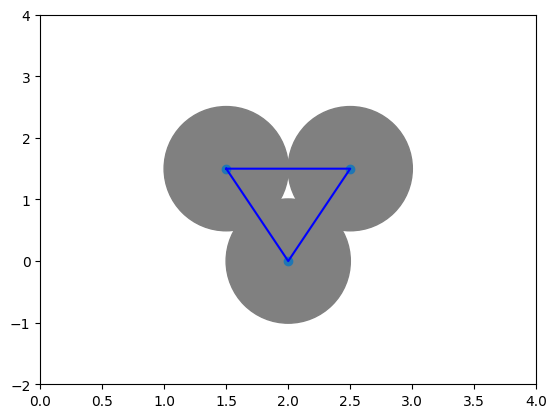

In [60]:
ax = plt.gca()
ax.set_xlim([0, 4])
ax.set_ylim([-2, 4])
plt.scatter([1.5,2,2.5],[1.5,0,1.5],[8000,8000,8000],color='gray')
plt.scatter([1.5,2,2.5],[1.5,0,1.5])
plt.plot([1.5,2.5,2,1.5],[1.5,1.5,0,1.5],color='blue')


plt.savefig('04_07')

![title](04_07.png)

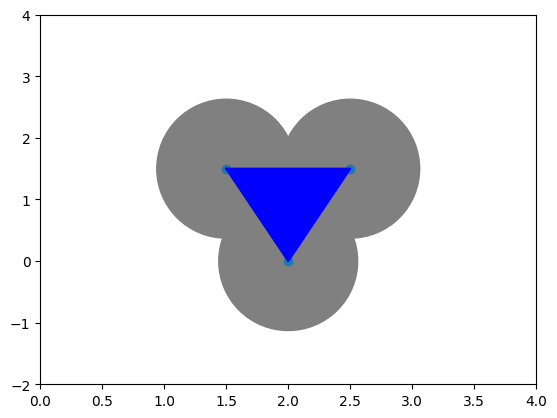

In [64]:
ax = plt.gca()
ax.set_xlim([0, 4])
ax.set_ylim([-2, 4])
plt.scatter([1.5,2,2.5],[1.5,0,1.5],[10000,10000,10000],color='gray')
plt.scatter([1.5,2,2.5],[1.5,0,1.5])
plt.plot([1.5,2.5,2,1.5],[1.5,1.5,0,1.5],color='blue')
t3= plt.Polygon([[1.5,1.5],[2.5,1.5],[2,0],[1.5,1.5]],color='blue')
plt.gca().add_patch(t3)
plt.savefig('04_08')

![title](04_08.png)

## Voronoi cells and the Delaunay triangulation


Problem with Vietoris--Rips and Čech: both are abstract and not embedded in $\mathbb{R}^n$. 

Possible solution: Voronoi cells (named after Georgy Voronoi, mathematician of Ukrainian descent, Professor at University of Warsaw)

**Definition:** Let $X\subset \mathbb{R}^n$ be a point cloud and let $p\in X$ be a point. The *Voronoi cell* of $p$ is defined as

$$
Vor(p,X):=\{q\in \mathbb{R}^n \vert d(p,q)\leq d(p',q) \forall p'\in X\setminus \{p\} \}
$$

![title](04_01.png)

(-1.0, 3.0)

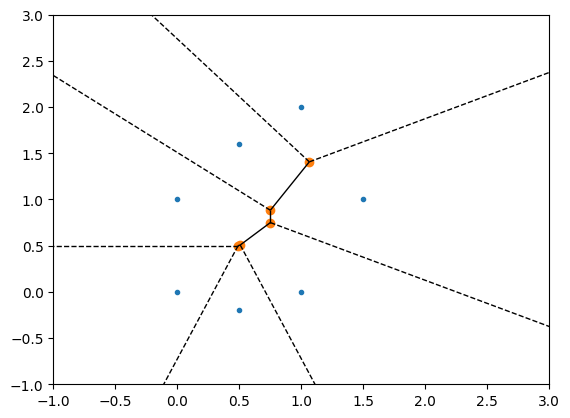

In [109]:
Vor = Voronoi(points)
fig= voronoi_plot_2d(Vor)
ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])

## Voronoi cells and the Delaunay triangulation

**Definition:** Let $X\subset \mathbb{R}^n$ be a point cloud. The *Voronoi diagram* associated with $X$ is the closed convex cover given by the Voronoi cells. 

The *Delaunay triangulation* $\operatorname{Del}(X)$ associated with $X$ is the nerve of the Voronoi diagram.

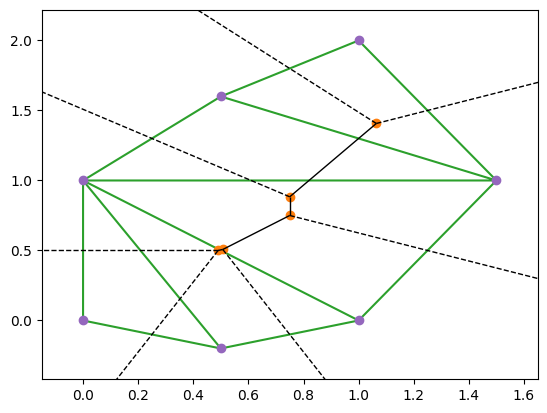

In [102]:
Vor = Voronoi(points)
fig= voronoi_plot_2d(Vor)
tri = sp.spatial.Delaunay(points=points)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.savefig('04_09')

![title](04_09.png)

## The Delaunay complex/ Alpha complex

We want to combine both approaches:

**Definition:** 
Let $X\subset \mathbb{R}^n$ be a point cloud and let $p\in X$ be a point. The *Voronoi ball* of radius $\epsilon$ around $p$ is defined as 
$$
\operatorname{Vor}_\epsilon(p,X):= B_\epsilon(p) \cap \operatorname{Vor}(p,X).
$$

The *Delaunay complex* $\operatorname{Del}_\epsilon$ of $X$ is the nerve of the Voronoi balls.

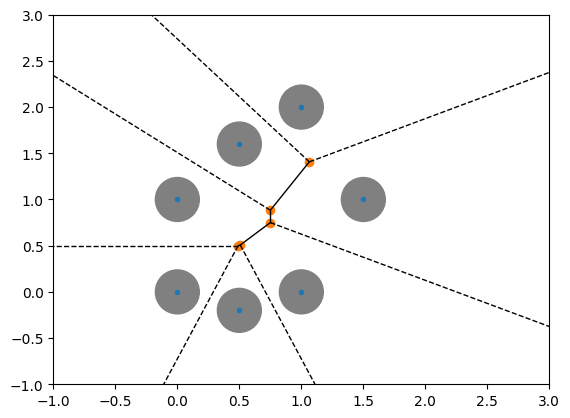

In [98]:
Vor = Voronoi(points)
fig= voronoi_plot_2d(Vor)
ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
plt.scatter(xpoints,ypoints,bsizes,color='gray')
plt.savefig('04_10')

![title](04_10.png)

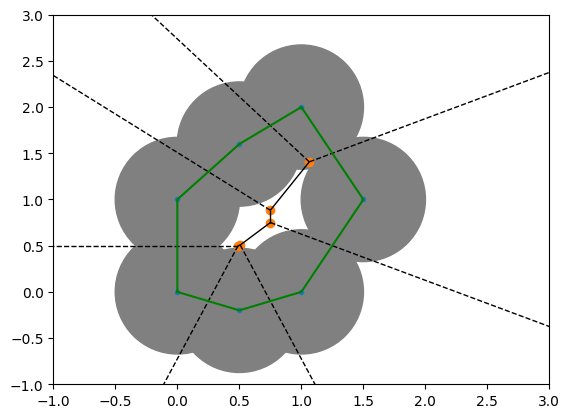

In [100]:
Vor = Voronoi(points)
fig= voronoi_plot_2d(Vor)
ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
plt.scatter(xpoints,ypoints,esizes,color='gray')
plt.plot([0,0,0.5,1,1.5,1,0.5,0],[0,1,1.6,2,1,0,-0.2,0],color='green')
plt.savefig('04_11')

![title](04_11.png)

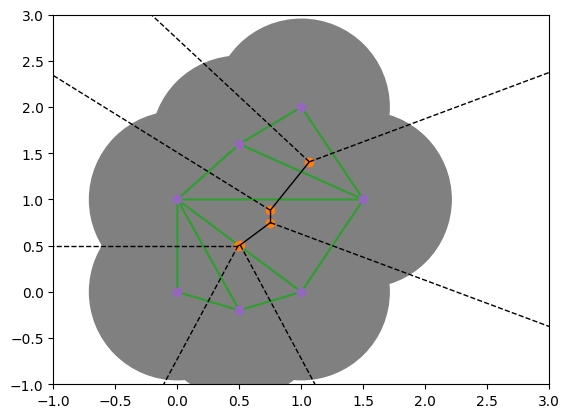

In [104]:
Vor = Voronoi(points)
fig= voronoi_plot_2d(Vor)
ax = plt.gca()
ax.set_xlim([-1, 3])
ax.set_ylim([-1, 3])
plt.scatter(xpoints,ypoints,fsizes,color='gray')
tri = sp.spatial.Delaunay(points=points)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.savefig('04_12')

![title](04_12.png)

## The Delaunay--Čech complex

A similar but slightly different approach is the Delaunay--Čech complex:

**Definition:** Let $X\subset \mathbb{R}^n$ be a point cloud. The *Delaunay--Čech complex* of $X$ is defined as
$$
\operatorname{DelČ}_\epsilon(X) := \{\sigma \in \operatorname{Del}(X) \vert \bigcap_{p\in \sigma} B_{\epsilon}(p)\neq \emptyset \}
$$

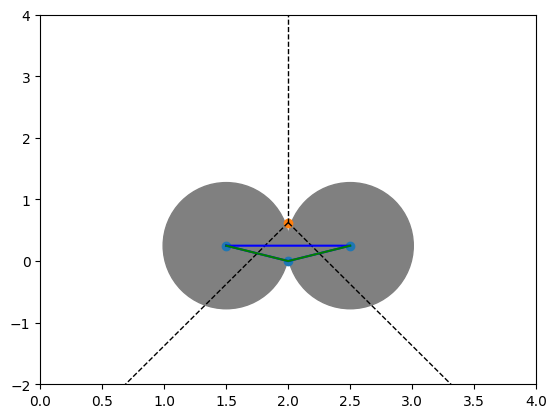

In [130]:
V = Voronoi([[1.5,0.25],[2,0],[2.5,0.25]])
fig= voronoi_plot_2d(V)
ax = plt.gca()
ax.set_xlim([0, 4])
ax.set_ylim([-2, 4])
plt.scatter([1.5,2.5],[0.25,0.25],[8250,8250],color='gray')
plt.scatter([1.5,2,2.5],[0.25,0,0.25])
plt.plot([1.5,2.5,2,1.5],[0.25,0.25,0,0.25],color='blue')
plt.plot([1.5,2,2.5],[0.25,0,0.25],color='green')
plt.savefig('04_13')

![title](04_13.png)